In [1]:
import sys
assert sys.version_info >= (3, 5)
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
val = int(input("Which file do you want classified? 1 for Q3, 2 for Q5.1, 3 for Q5.2 and 4 for Q5.3: "))
image_data = ""

if val == 1:
    image_data = "x_train_gr_smpl_random_reduced.csv"
    
elif val == 2:
    image_data = "train_sampl_1.csv"
    
elif val == 3:
    image_data = "train_sampl_2.csv"
elif  val == 4:
    image_data = "train_sampl_3.csv"
    
print(val)
print(image_data)

label_data = "y_train_smpl_random.csv"

#reads the data from the files
x_data = pd.read_csv(image_data)
y_data = pd.read_csv(label_data)

df1 = pd.DataFrame(x_data)
df2 = pd.DataFrame(y_data)

#turns the dataframes to numpy arrays
X= df1.values
#ravel flattens the labels array into a one dimensional array
Y= df2.values.ravel()

Which file do you want classified? 1 for Q3, 2 for Q5.1, 3 for Q5.2 and 4 for Q5.3: 1
1
x_train_gr_smpl_random_reduced.csv


In [15]:
# Preprocessing to check if the datatypes and arrays are ready to use
print(X.dtype, Y.dtype)
print(X.shape, Y.shape)

int64 int64
(9689, 1225) (9689,)


In [4]:
# Trains the model for 70% of the images array and 30% of the labels
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y)

In [5]:
train_X.shape, test_X.shape

((7266, 1225), (2423, 1225))

In [6]:
#Using the multinomial baive bayes algorithm as it is suitable for classification with discrete features i.e. the pixels that make up the images
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
clas = MultinomialNB()
clas.fit(train_X, train_Y)

MultinomialNB()

In [7]:
#Returns the accuracy on the given test data and labels.
clas.score(test_X, test_Y)

0.3619479983491539

In [8]:
from sklearn.metrics import classification_report
predictions = clas.predict(test_X)

#Test used in Q5 to check if every label has been predicted
labels1 = set(test_Y) - set(predictions)

for i in labels1:
    print(i)
    
print(classification_report(test_Y, predictions, labels=np.unique(predictions)))

              precision    recall  f1-score   support

           0       0.10      0.48      0.16        50
           1       0.42      0.20      0.27       555
           2       0.44      0.35      0.39       553
           3       0.36      0.37      0.36       354
           4       0.44      0.62      0.51       482
           5       0.19      0.71      0.29        51
           6       0.23      0.14      0.17       107
           7       0.31      0.29      0.30        58
           8       0.59      0.26      0.36       142
           9       0.28      0.23      0.25        71

    accuracy                           0.36      2423
   macro avg       0.34      0.36      0.31      2423
weighted avg       0.40      0.36      0.36      2423



In [9]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) //n_cols
    fig = plt.figure(figsize=(8, 8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
plt.show()

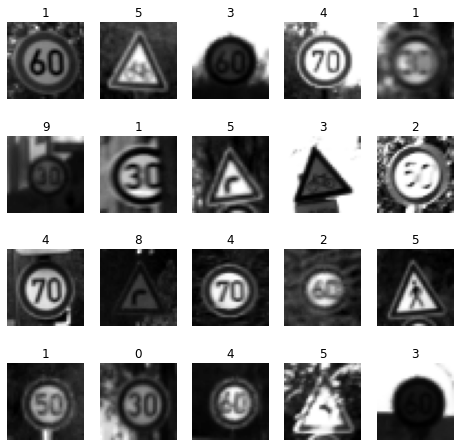

In [10]:
p = np.random.permutation(len(test_X))
p = p[:20]

dataset = image_data
if dataset == 'x_train_gr_smpl_random_reduced.csv':
    plot_images(test_X[p].reshape(-1, 35, 35), predictions[p])

elif dataset == 'train_sampl_1.csv':
    plot_images(test_X[p].reshape(-1, 2, 2), predictions[p])

elif dataset == 'train_sampl_2.csv':
    plot_images(test_X[p].reshape(-1, 5, 5), predictions[p])

elif  dataset == 'train_sampl_3.csv':
    plot_images(test_X[p].reshape(-1, 4, 4), predictions[p])

In [11]:
ycount = np.ones((10))

In [12]:
#Calculates the probablities of each class
for x, y in zip(X, Y):
    y1 = int(y)
    ycount[y1] += 1
        
py = (ycount/ ycount.sum()) * 100

print('Probablities', py)

Probablities [ 2.16517167 22.89926797 23.2085782  14.54789154 20.42478606  2.17548201
  3.7220332   2.48479225  5.57789463  2.79410248]


In [13]:
classifier = clas

Confusion matrix, without normalization
[[ 24   7   9   6   3   0   1   0   0   0]
 [138 109 103  70 105   1  14   0   3  12]
 [ 44  48 193  62 178   9   2   4   2  11]
 [ 20  36  68 132  88   3   1   0   1   5]
 [ 16  43  42  68 298   2   4   0   1   8]
 [  0   0   3   0   3  36   2   2   5   0]
 [  1   8   2  11   3  42  15  14  10   1]
 [  0   0   0   5   1  27   3  17   2   3]
 [  2   1   6   4   2  56  19  14  37   1]
 [  1   5  10  12   0  18   4   3   2  16]]
Normalized confusion matrix
[[0.48 0.14 0.18 0.12 0.06 0.   0.02 0.   0.   0.  ]
 [0.25 0.2  0.19 0.13 0.19 0.   0.03 0.   0.01 0.02]
 [0.08 0.09 0.35 0.11 0.32 0.02 0.   0.01 0.   0.02]
 [0.06 0.1  0.19 0.37 0.25 0.01 0.   0.   0.   0.01]
 [0.03 0.09 0.09 0.14 0.62 0.   0.01 0.   0.   0.02]
 [0.   0.   0.06 0.   0.06 0.71 0.04 0.04 0.1  0.  ]
 [0.01 0.07 0.02 0.1  0.03 0.39 0.14 0.13 0.09 0.01]
 [0.   0.   0.   0.09 0.02 0.47 0.05 0.29 0.03 0.05]
 [0.01 0.01 0.04 0.03 0.01 0.39 0.13 0.1  0.26 0.01]
 [0.01 0.07 0.14 0.17 0.

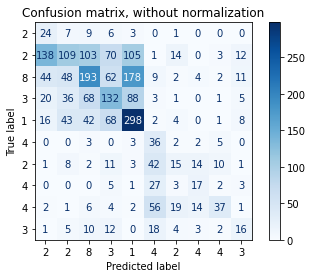

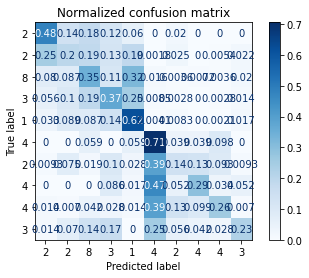

In [14]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, test_X, test_Y,
                                 display_labels=Y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()